In [1]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras import layers
from keras import models
import  pandas as pd
import  os
from keras.models import Sequential, load_model

## https://blog.csdn.net/muzi_water/article/details/103969988
 

In [13]:
def NormalizeMult(data):
    data = np.array(data)
    normalize = np.arange(2*data.shape[1],dtype='float64')
    normalize = normalize.reshape(data.shape[1],2)
    print(normalize.shape)
    for i in range(0,data.shape[1]):
        #第i列
        list = data[:,i]
        listlow,listhigh =  np.percentile(list, [0, 100])
        # print(i)
        normalize[i,0] = listlow
        normalize[i,1] = listhigh
        delta = listhigh - listlow
        if delta != 0:
            #第j行
            for j in range(0,data.shape[0]):
                data[j,i]  =  (data[j,i] - listlow)/delta
    #np.save("./normalize.npy",normalize)
    return  data,normalize

In [14]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

In [41]:

def reshape_y_hat(y_hat,dim):
    re_y = []
    i = 0
    while i < len(y_hat):
        tmp = []
        for j in range(dim):
            tmp.append(y_hat[i+j])
        i = i + dim
        re_y.append(tmp)
    re_y = np.array(re_y, dtype='float64')
    return re_y


In [15]:
def NormalizeMultUseData(data,normalize):
 
    for i in range(0, data.shape[1]):
 
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
 
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data


In [136]:
def FNormalizeMult(data,normalize):
 
    data = np.array(data, dtype='float64')
    #列
    for i in range(0, data.shape[1]):
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
        print("listlow, listhigh, delta", listlow, listhigh, delta)
        #行
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = data[j, i]*delta + listlow
 
    return data

In [3]:
## https://blog.csdn.net/qq_35649669/article/details/89575949

def create_dataset(data,n_predictions,n_next):
    '''
    对数据进行处理
    '''
    dim = data.shape[1]
    train_X, train_Y = [], []
    for i in range(data.shape[0]-n_predictions-n_next-1):
        a = data[i:(i+n_predictions),:]
        train_X.append(a)
        tempb = data[(i+n_predictions):(i+n_predictions+n_next),:]
        b = []
        for j in range(len(tempb)):
            for k in range(dim):
                b.append(tempb[j,k])
        train_Y.append(b)
    train_X = np.array(train_X,dtype='float64')
    train_Y = np.array(train_Y,dtype='float64')

    return train_X, train_Y



In [4]:
def trainModel(train_X, train_Y):
    '''
    trainX，trainY: 训练LSTM模型所需要的数据
    '''
    model = Sequential()
    model.add(LSTM(
        140,
        input_shape=(train_X.shape[1], train_X.shape[2]),
        return_sequences=True))
    model.add(Dropout(0.3))

    model.add(LSTM(
        140,
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        train_Y.shape[1]))
    model.add(Activation("relu"))

    model.compile(loss='mse', optimizer='adam')
    model.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1)

    return model


In [102]:
all_data = pd.read_csv('./data/2021MCMProblemC_DataSet.csv', encoding='utf-8', index_col='Detection Date')
# all_data
## for the first question, only keep track of the sightings in 2019 and 2020
all_data.index = pd.to_datetime(all_data.index, errors='coerce')
all_data = all_data.sort_values(by = 'Detection Date', ascending=True)
data = all_data[(all_data.index >= "2019/1/1") & (all_data['Lab Status'] == "Unverified") | (all_data['Lab Status'] == "Positive ID")]
train_data= data


In [103]:
train_data = pd.DataFrame(train_data, columns = ['Latitude', 'Longitude'])
train_data = train_data.values
train_data, normalize = NormalizeMult(train_data)
train_X, train_Y = create_dataset(train_data, 200, 50)
train_data

(2, 2)


array([[0.18401312, 0.63756412],
       [0.49558309, 0.28713193],
       [0.61144959, 0.3333948 ],
       ...,
       [0.48791756, 0.32534307],
       [0.88488353, 0.27687647],
       [0.56437645, 0.51770374]])

In [106]:
model = trainModel(train_X, train_Y)

Epoch 1/100
33/33 [==============================] - 40s 1s/step - loss: 0.1435
Epoch 2/100
33/33 [==============================] - 33s 966ms/step - loss: 0.0488
Epoch 3/100
33/33 [==============================] - 30s 906ms/step - loss: 0.0436
Epoch 4/100
33/33 [==============================] - 28s 858ms/step - loss: 0.0422
Epoch 5/100
33/33 [==============================] - 29s 878ms/step - loss: 0.0406
Epoch 6/100
33/33 [==============================] - 29s 873ms/step - loss: 0.0400
Epoch 7/100
33/33 [==============================] - 29s 874ms/step - loss: 0.0394
Epoch 8/100
33/33 [==============================] - 29s 872ms/step - loss: 0.0395
Epoch 9/100
33/33 [==============================] - 30s 912ms/step - loss: 0.0383
Epoch 10/100
33/33 [==============================] - 32s 964ms/step - loss: 0.0378
Epoch 11/100
33/33 [==============================] - 30s 897ms/step - loss: 0.0375
Epoch 12/100
33/33 [==============================] - 30s 905ms/step - loss: 0.0385
Epoc

In [166]:
# numpy.save("./MultiSteup2.npy",train_data)
# model.save("./MultiSteup2.h5")
test = data[-200:]
test_X = pd.DataFrame(test, columns = ['Latitude', 'Longitude'])
test_X = test_X.values
test_X = test_X.reshape(1, 200, 2)
y_hat = model.predict(test_X)
y_hat = y_hat.reshape(y_hat.shape[1])
y_hat = reshape_y_hat(y_hat, dim=2)
print(y_hat)
y_hat = FNormalizeMult(y_hat, normalize)
forecast = pd.DataFrame(y_hat,index=data.index[-50:], columns=['Latitude', 'Longitude'])
forecast['Latitude'] = forecast['Latitude']-3
forecast.to_csv("./coordinates.csv")

[[1.77729166 0.02749442]
 [1.39236784 0.10409954]
 [1.71155858 0.01654384]
 [1.87192202 0.24024622]
 [1.41293228 0.07856247]
 [1.39808655 0.08892995]
 [1.5681293  0.15631542]
 [1.60822833 0.10555761]
 [1.63770235 0.        ]
 [1.72313344 0.        ]
 [1.1814549  0.0743838 ]
 [1.1007247  0.04044657]
 [1.49835229 0.        ]
 [1.6171267  0.11776862]
 [1.385607   0.28502905]
 [1.40894938 0.36907452]
 [1.72263157 0.        ]
 [1.66160119 0.19944869]
 [1.49332201 0.07216631]
 [1.5138948  0.        ]
 [1.28854942 0.        ]
 [1.56154466 0.05612726]
 [1.46659386 0.        ]
 [1.56549287 0.        ]
 [1.61919355 0.14581269]
 [1.82487166 0.        ]
 [1.53796339 0.        ]
 [1.35038114 0.        ]
 [1.38229382 0.        ]
 [1.32930648 0.0037905 ]
 [1.41119421 0.        ]
 [1.38433552 0.        ]
 [1.44985473 0.12034211]
 [1.32665598 0.04569607]
 [1.51556528 0.07067113]
 [1.41040123 0.        ]
 [1.61580205 0.15549129]
 [1.66114092 0.26238203]
 [1.60102582 0.15600017]
 [1.46847677 0.08857397]


PermissionError: [Errno 13] Permission denied: './coordinates.csv'

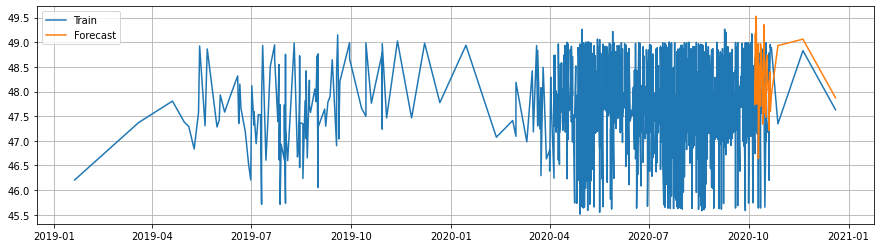

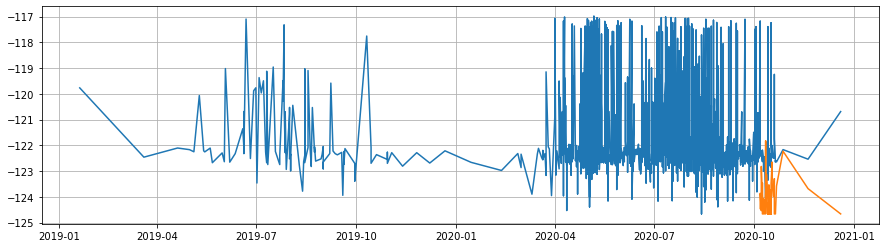

In [167]:
plt.figure(figsize=(15,4))
forecast
plt.grid(True)
plt.plot(data['Latitude'], label='Train')
plt.plot(forecast['Latitude'], label='Forecast')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(data['Longitude'], label='Train')
plt.plot(forecast['Longitude'], label='Forecast')